다음의 캐글 노트북을 필사했습니다.  
https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough/data

# Data

## File descriptions

* train | test.csv  
  * 이것은 메인 테이블이며 Train, Test 의 두 파일로 쪼개져 있습니다.  
  * 하나의 행은 데이터 샘플에 있어 한 사람을 나타냅니다.  
  * 여러 사람이 하나의 가정의 일부가 될 수 있습니다.

* sample_submission.csv - 올바른 형식의 샘플 제출 파일입니다.  
  * 이 파일은 모든 test ID와 기본 설정된 값을 포함합니다.  
  * 오직 households의 heads 만이 scoriing에 사용된다는 점을 기억하세요. 모든 가정의 멤버는  test + sample submiission에 포함되지만 오직 가정의 세대주만 채점됩니다.

## Core Data fields

* id - 각 행에 대한 유일한 식별자  
* Target - 타겟은 서수(순서가 있는) 변수이며 소득 수준의 그룹을 나타냅니다.  
  * 1 = 매우 가난함
  * 2 = 중간 정도로 가난함
  * 3 = 취약한 가구  
  * 4 = 취약하지 않은 가구
* idhogar - 이는 각 가정에 대해 유일한 식별자입니다. 이는 가정에 걸친 feature 등을  생성하는데 쓰일 수 있습니다. 주어진 household의 모든 행은 이 identifier과 matching 되는 값을 가질 것입니다.  
* parentesco1 - 이 사람이 세대주인지 나타냅니다.  
* 이 데이터는 총 142 개의 컬럼을 포함합니다.

# All Data fields

변수 이름, 변수 설명

In [1]:
text = """
v2a1, Monthly rent payment
hacdor, =1 Overcrowding by bedrooms
rooms,
number of all rooms in the house
hacapo, =1 Overcrowding by rooms
v14a, =1 has bathroom in the household
refrig, =1 if the household has refrigerator
v18q, owns a tablet
v18q1, number of tablets household owns 
r4h1, Males younger than 12 years of age
r4h2, Males 12 years of age and older
r4h3, Total males in the household
r4m1, Females younger than 12 years of age
r4m2, Females 12 years of age and older
r4m3, Total females in the household
r4t1, persons younger than 12 years of age
r4t2, persons 12 years of age and older
r4t3, Total persons in the household
tamhog, size of the household
tamviv, number of persons living in the household
escolari, years of schooling
rez_esc, Years behind in school
hhsize, household size
paredblolad, =1 if predominant material on the outside wall is block or brick
paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
pareddes, =1 if predominant material on the outside wall is waste material
paredmad, =1 if predominant material on the outside wall is wood
paredzinc, =1 if predominant material on the outside wall is zink
paredfibras, =1 if predominant material on the outside wall is natural fibers
paredother, =1 if predominant material on the outside wall is other
pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento, =1 if predominant material on the floor is cement
pisoother, =1 if predominant material on the floor is other
pisonatur, =1 if predominant material on the floor is  natural material
pisonotiene, =1 if no floor at the household
pisomadera, =1 if predominant material on the floor is wood
techozinc, =1 if predominant material on the roof is metal foil or zink
techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane, =1 if predominant material on the roof is natural fibers
techootro, =1 if predominant material on the roof is other
cielorazo, =1 if the house has ceiling
abastaguadentro, =1 if water provision inside the dwelling
abastaguafuera, =1 if water provision outside the dwelling
abastaguano, =1 if no water provision
public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri, =1 electricity from private plant
noelec, =1 no electricity in the dwelling
coopele, =1 electricity from cooperative
sanitario1, =1 no toilet in the dwelling
sanitario2, =1 toilet connected to sewer or cesspool
sanitario3, =1 toilet connected to  septic tank
sanitario5, =1 toilet connected to black hole or letrine
sanitario6, =1 toilet connected to other system
energcocinar1, =1 no main source of energy used for cooking (no kitchen)
energcocinar2, =1 main source of energy used for cooking electricity
energcocinar3, =1 main source of energy used for cooking gas
energcocinar4, =1 main source of energy used for cooking wood charcoal
elimbasu1, =1 if rubbish disposal mainly by tanker truck
elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3, =1 if rubbish disposal mainly by burning
elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6, =1 if rubbish disposal mainly other
epared1, =1 if walls are bad
epared2, =1 if walls are regular
epared3, =1 if walls are good
etecho1, =1 if roof are bad
etecho2, =1 if roof are regular
etecho3, =1 if roof are good
eviv1, =1 if floor are bad
eviv2, =1 if floor are regular
eviv3, =1 if floor are good
dis, =1 if disable person
male, =1 if male
female, =1 if female
estadocivil1, =1 if less than 10 years old
estadocivil2, =1 if free or coupled uunion
estadocivil3, =1 if married
estadocivil4, =1 if divorced
estadocivil5, =1 if separated
estadocivil6, =1 if widow/er
estadocivil7, =1 if single
parentesco1, =1 if household head
parentesco2, =1 if spouse/partner
parentesco3, =1 if son/doughter
parentesco4, =1 if stepson/doughter
parentesco5, =1 if son/doughter in law
parentesco6, =1 if grandson/doughter
parentesco7, =1 if mother/father
parentesco8, =1 if father/mother in law
parentesco9, =1 if brother/sister
parentesco10, =1 if brother/sister in law
parentesco11, =1 if other family member
parentesco12, =1 if other non family member
idhogar, Household level identifier
hogar_nin, Number of children 0 to 19 in household
hogar_adul, Number of adults in household
hogar_mayor, # of individuals 65+ in the household
hogar_total, # of total individuals in the household
dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc,average years of education for adults (18+)
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary
instlevel3, =1 complete primary
instlevel4, =1 incomplete academic secondary level
instlevel5, =1 complete academic secondary level
instlevel6, =1 incomplete technical secondary level
instlevel7, =1 complete technical secondary level
instlevel8, =1 undergraduate and higher education
instlevel9, =1 postgraduate higher education
bedrooms, number of bedrooms
overcrowding, # persons per room
tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own,  paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned,  borrowed)"
computer, =1 if the household has notebook or desktop computer
television, =1 if the household has TV
mobilephone, =1 if mobile phone
qmobilephone, # of mobile phones
lugar1, =1 region Central
lugar2, =1 region Chorotega
lugar3, =1 region PacÃƒÂ­fico central
lugar4, =1 region Brunca
lugar5, =1 region Huetar AtlÃƒÂ¡ntica
lugar6, =1 region Huetar Norte
area1, =1 zona urbana
area2, =2 zona rural
age, Age in years
SQBescolari, escolari squared
SQBage, age squared
SQBhogar_total, hogar_total squared
SQBedjefe, edjefe squared
SQBhogar_nin, hogar_nin squared
SQBovercrowding, overcrowding squared
SQBdependency, dependency squared
SQBmeaned, square of the mean years of education of adults (>=18) in the household
agesq, Age squared
"""

In [2]:
import re

text = re.sub(r'[\n]', '<br/>' , text)

v2a1, Monthly rent payment<br/>hacdor, =1 Overcrowding by bedrooms<br/>rooms,<br/>number of all rooms in the house<br/>hacapo, =1 Overcrowding by rooms<br/>v14a, =1 has bathroom in the household<br/>refrig, =1 if the household has refrigerator<br/>v18q, owns a tablet<br/>v18q1, number of tablets household owns <br/>r4h1, Males younger than 12 years of age<br/>r4h2, Males 12 years of age and older<br/>r4h3, Total males in the household<br/>r4m1, Females younger than 12 years of age<br/>r4m2, Females 12 years of age and older<br/>r4m3, Total females in the household<br/>r4t1, persons younger than 12 years of age<br/>r4t2, persons 12 years of age and older<br/>r4t3, Total persons in the household<br/>tamhog, size of the household<br/>tamviv, number of persons living in the household<br/>escolari, years of schooling<br/>rez_esc, Years behind in school<br/>hhsize, household size<br/>paredblolad, =1 if predominant material on the outside wall is block or brick<br/>paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"<br/>paredpreb, =1 if predominant material on the outside wall is prefabricated or cement<br/>pareddes, =1 if predominant material on the outside wall is waste material<br/>paredmad, =1 if predominant material on the outside wall is wood<br/>paredzinc, =1 if predominant material on the outside wall is zink<br/>paredfibras, =1 if predominant material on the outside wall is natural fibers<br/>paredother, =1 if predominant material on the outside wall is other<br/>pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"<br/>pisocemento, =1 if predominant material on the floor is cement<br/>pisoother, =1 if predominant material on the floor is other<br/>pisonatur, =1 if predominant material on the floor is  natural material<br/>pisonotiene, =1 if no floor at the household<br/>pisomadera, =1 if predominant material on the floor is wood<br/>techozinc, =1 if predominant material on the roof is metal foil or zink<br/>techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "<br/>techocane, =1 if predominant material on the roof is natural fibers<br/>techootro, =1 if predominant material on the roof is other<br/>cielorazo, =1 if the house has ceiling<br/>abastaguadentro, =1 if water provision inside the dwelling<br/>abastaguafuera, =1 if water provision outside the dwelling<br/>abastaguano, =1 if no water provision<br/>public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"<br/>planpri, =1 electricity from private plant<br/>noelec, =1 no electricity in the dwelling<br/>coopele, =1 electricity from cooperative<br/>sanitario1, =1 no toilet in the dwelling<br/>sanitario2, =1 toilet connected to sewer or cesspool<br/>sanitario3, =1 toilet connected to  septic tank<br/>sanitario5, =1 toilet connected to black hole or letrine<br/>sanitario6, =1 toilet connected to other system<br/>energcocinar1, =1 no main source of energy used for cooking (no kitchen)<br/>energcocinar2, =1 main source of energy used for cooking electricity<br/>energcocinar3, =1 main source of energy used for cooking gas<br/>energcocinar4, =1 main source of energy used for cooking wood charcoal<br/>elimbasu1, =1 if rubbish disposal mainly by tanker truck<br/>elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried<br/>elimbasu3, =1 if rubbish disposal mainly by burning<br/>elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space<br/>elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"<br/>elimbasu6, =1 if rubbish disposal mainly other<br/>epared1, =1 if walls are bad<br/>epared2, =1 if walls are regular<br/>epared3, =1 if walls are good<br/>etecho1, =1 if roof are bad<br/>etecho2, =1 if roof are regular<br/>etecho3, =1 if roof are good<br/>eviv1, =1 if floor are bad<br/>eviv2, =1 if floor are regular<br/>eviv3, =1 if floor are good<br/>dis, =1 if disable person<br/>male, =1 if male<br/>female, =1 if female<br/>estadocivil1, =1 if less than 10 years old<br/>estadocivil2, =1 if free or coupled uunion<br/>estadocivil3, =1 if married<br/>estadocivil4, =1 if divorced<br/>estadocivil5, =1 if separated<br/>estadocivil6, =1 if widow/er<br/>estadocivil7, =1 if single<br/>parentesco1, =1 if household head<br/>parentesco2, =1 if spouse/partner<br/>parentesco3, =1 if son/doughter<br/>parentesco4, =1 if stepson/doughter<br/>parentesco5, =1 if son/doughter in law<br/>parentesco6, =1 if grandson/doughter<br/>parentesco7, =1 if mother/father<br/>parentesco8, =1 if father/mother in law<br/>parentesco9, =1 if brother/sister<br/>parentesco10, =1 if brother/sister in law<br/>parentesco11, =1 if other family member<br/>parentesco12, =1 if other non family member<br/>idhogar, Household level identifier<br/>hogar_nin, Number of children 0 to 19 in household<br/>hogar_adul, Number of adults in household<br/>hogar_mayor, # of individuals 65+ in the household<br/>hogar_total, # of total individuals in the household<br/>dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)<br/>edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0<br/>edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0<br/>meaneduc,average years of education for adults (18+)<br/>instlevel1, =1 no level of education<br/>instlevel2, =1 incomplete primary<br/>instlevel3, =1 complete primary<br/>instlevel4, =1 incomplete academic secondary level<br/>instlevel5, =1 complete academic secondary level<br/>instlevel6, =1 incomplete technical secondary level<br/>instlevel7, =1 complete technical secondary level<br/>instlevel8, =1 undergraduate and higher education<br/>instlevel9, =1 postgraduate higher education<br/>bedrooms, number of bedrooms<br/>overcrowding, # persons per room<br/>tipovivi1, =1 own and fully paid house<br/>tipovivi2, "=1 own,  paying in installments"<br/>tipovivi3, =1 rented<br/>tipovivi4, =1 precarious<br/>tipovivi5, "=1 other(assigned,  borrowed)"<br/>computer, =1 if the household has notebook or desktop computer<br/>television, =1 if the household has TV<br/>mobilephone, =1 if mobile phone<br/>qmobilephone, # of mobile phones<br/>lugar1, =1 region Central<br/>lugar2, =1 region Chorotega<br/>lugar3, =1 region PacÃƒÂ\xadfico central<br/>lugar4, =1 region Brunca<br/>lugar5, =1 region Huetar AtlÃƒÂ¡ntica<br/>lugar6, =1 region Huetar Norte<br/>area1, =1 zona urbana<br/>area2, =2 zona rural<br/>age, Age in years<br/>SQBescolari, escolari squared<br/>SQBage, age squared<br/>SQBhogar_total, hogar_total squared<br/>SQBedjefe, edjefe squared<br/>SQBhogar_nin, hogar_nin squared<br/>SQBovercrowding, overcrowding squared<br/>SQBdependency, dependency squared<br/>SQBmeaned, square of the mean years of education of adults (>=18) in the household<br/>agesq, Age squared

# Costa Rican Household Poverty Level Prediction

Costa Rican Household Poverty Level Prediction 대회의 목적은 머신러닝 모델을 발전시키는 것인데, 그건 개인과 가구의 특성 모두를 활용해 가정의 가난 수준을 예측하는 것입니다. 이 프로젝트는 사람들이 광고를 클릭하게 하는 것 보다 사회적으로 더욱 이득이 되는 과제에 우리의 스킬을 넣을 수 있는 기회를 제공합니다.

이 노트북에서, 완전한 머신러닝 솔루션에 대해 설명할 것입니다. 첫번째로 문제에 대해서 소개한 이후 데이터 셋에 대해서 철저한 탐색적 데이터 분석을 수행하고, 피처 엔지니어링을 할 것이며 여러 개의 머신러닝 모델을 시도하고, 모델을 선택하고 최적화하며 마지막으로 모델의 아웃풋을 점검해 결과를 이끌어낼 것입니다. 

This is a supervised multi-class classification machine learning problem:  
  
Supervised: provided with the labels for the training data  
Multi-class classification: Labels are discrete values with 4 classes

**중요 참고 사항: 모든 가구 구성원이 교육 데이터에서 동일한 레이블을 가져야 하지만 동일한 가정의 개인이 다른 레이블을 갖는 오류가 있습니다. 이러한 경우, 우리는 각 가구의 가장에 대한 레이블을 사용하라는 지시를 받았으며, 이는 parentesco1 == 1.0인 행으로 식별할 수 있습니다.**

모델을 만들 때 우리는 household를 훈련합니다. 각각의 가정(세대주의 가난의 수준)에 대한 레이블에 기초를 두고. raw data는 가정과 개인에 대한 특성과 개인에 대한 데이터를 포함하기 때문에 각각의 가구에 대해 집계할 방법을 찾아야 합니다. 가구에 속한 일부 개인은 세대주가 없을 수 있는데 이는 불행히도 이러한 데이터를 트레이닝에 쓸 수 없다는 것을 의미합니다. 데이터와 관련한 이러한 이슈는 완전히 **real-world** 데이터의 전형이며 그러므로 이러한 문제는 당신이 데이터 사이언스 업무에서 마주치게 될 데이터셋에 대한 훌륭한 준비입니다.

## Metric

궁극적으로 우리는 가구의 가난 수준을 정수로 예측할 수 있는 머신러닝 모델을 만들길 원합니다. 우리의 예측은 **Macro F1 Score**로 평가될 것입니다. 아마 당신은 binary classification 문제의 standard F1 score에 익숙할 것입니다. 이는 precision과 recall에 대한 조화평균입니다.

$F_1$ = $\frac{2}{\frac{1}{recall}+\frac{1}{precision}}$ = 2*$\frac{precision * recall}{precision + recall}$

multi-class 문제에 있어서는 각각의 calss에 대해 F1스코어를 평균해야 합니다. macro F1 score은 각각의 클래스에 대해 F1스코어를 평균한 것입니다. 레이블의 불균형을 고려하지 않고

$Macro F1 = \frac{F1 Class 1 + F1 Class 2 + F1 Class 3 + F1 Class 4}{4}$

다른 말로, 각 레이블 발생 횟수는 macro를 사용할 때 계산에 포함되지 않습니다. (반면 "weighted" score를 쓸 때는 계산에 포함됩니다.)

from sklearn.metrics import f1_score  
f1_score(y_true, y_predicted, average = 'macro')

이 문제의 경우 레이블이 불균형한데, 이는 metric 평가에  macro averaging을 사용하는 것을 약간 낯설게 만듭니다. 하지만 이것이 주최측에서 내린 결론입니다. 그리고 우리가 바꿀 수 있는 것은 없습니다. 작업에 있어서 당신은 레이블 불균형에 대해서 더 알고싶어 할 수 있으며 이에 맞춰 metric을 선택하고 싶어 할 수 있습니다.

# Roadmap

주제의 끝은 가구의 빈곤 수준을 예측하는 모델입니다. 반면 모델에 빠져들기 전에 문제와 데이터에 대해서 이해하는 것은 중요합니다. 또한 하나의 모델을 "best"로써 선택하기 이전에 수 많은 모델을 평가하길 원하며 모델을 만든 이후에는 예측에 대해 살펴 보길 원합니다. 우리의 로드맵은 따라서 다음과 같습니다.

1. 문재를 이해하기  
2. 탐색적 데이터 분석  
3. 피처 엔지니어링을 통해 머신러닝을 위한 데이터셋 생성  
4. 몇 개의 베이스 라인 머신러닝 모델을 비교하기  
5. 더욱 복잡한 머신러닝 모델을 시도하기  
6. 선택된 모델을 최적화하기  
7. 문제의 맥락에 맞춰 모델 예측을 탐색하기  
8. 결론을 내고 다음 단계를 세우기

위의 다음 단계를 세우기는 한 번에 하나씩 살펴보는 동안 이전 스텝으로 되돌아가며 일부의 결론에 대해 다시 논의하는 것이 반복된다는 의미입니다. 일반적으로, 데이터 사이언스는 계속해서 과거의 결론을 평가하고 개선하는 non-linear 과제입니다. 특히, 피처 엔지니어링, 모델링, 그리고 최적화는 처음의 결정이 맞는 것인지 모르기 때문에 종종 반복하는 단계입니다.

# Getting Started

우리는 문제에 대해서 꽤 잘 파악하고 있습니다. 따라서 탐색적 데이터 분석과 피처 엔지니어링으로 넘어가겠습니다. EDA에서는 피처 엔지니어링과 모델링에 쓰일 수 있는 흥미로운 이상치나 추세, 상관관계 또는 패턴에 대해서 살펴볼 것입니다. 우리는 데이터를 양적으로(with statistics) 그리고 시각적으로(with figures) 탐색하는 것을 확실히 해두어야 합니다.

일단 데이터와 잠재적으로 유용한 관계에 대해 꽤 잘 알고 있기 때문에 피처 엔지니어링과 베이스라인 모델을 할 수 있습니다.(이는 머신러닝 파이프라인에 있어서 가장 중요한 부분입니다.) 이는 리더보드에서 top을 차지하게 해주지는 않지만 튼튼한 기반이 될 것입니다.

### Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Read in Data and Look at Summary information

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Costa Rican Household Poverty Level Prediction/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Costa Rican Household Poverty Level Prediction/data/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


이렇게 함으로써 순서가 없는 것으로 보이는 모든 컬럼들을 볼 수 있습니다. 빠르게 데이터의 개요를 보기 위해 `df.info()`를 사용하겠습니다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


이는 130개의 정수 컬럼, 8개의 소수 컬럼, 5개의 오브젝트 컬럼이 있음을 의미합니다. 정수 컬럼은 아마 Boolean 변수(0 or 1)나 순서형 변수로 나타날 것입니다. object 컬럼은 직접 머신러닝 모델에 넣지 못하기 때문에 아마 문제가 제기된 것 같습니다.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### integer Columns

정수 컬럼의 고유한 값의 분포를 살펴봅시다. 각각의 컬럼에 있어 고유한 값의 개수를 셀 것이며 bar plot으로 결과를 보여줄 것입니다.

In [8]:
train.select_dtypes(np.int64).nunique()

hacdor             2
rooms             11
hacapo             2
v14a               2
refrig             2
                  ..
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      10
agesq             97
Target             4
Length: 130, dtype: int64

In [9]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index()

1       1
2     101
4       2
6       2
7       3
9       3
10      3
11      3
13      5
14      1
22      3
97      3
dtype: int64

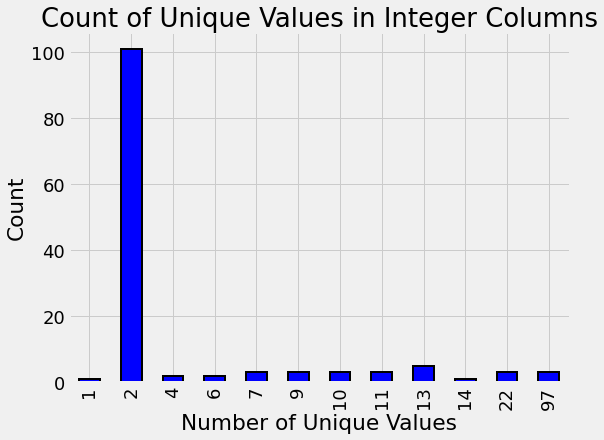

In [10]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', figsize = (8, 6), edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

오직 2개의 값만 있는 컬럼은 많은 경우 Booleans(0 or 1)로 나타납니다. 이러한 불린 정보는 이미 가구 수준에 있습니다. 예를 들어, `refrig` 컬럼은 가구가 냉장고의 소유 여부를 나타냅니다. 가구 수준에 있는 불린 컬럼으로 피처를 만들 때가 되면 이들을 집계할 필요가 없습니다. 반면에 개인의 수준에 있는 불린 컬럼은 집계할 필요가 있습니다.

### Float Columns

다른 컬럼 타입은 float인데 이는 연속적인 변수로 나타납니다. 우리는 빠르게 분포 플롯을 만들어서 모든 float 컬럼의 분포를 볼 수 있습니다. `OrderedDict`를 사용해서 빈곤 수준을 지도에 나타내 색을 칠할 것입니다. 왜냐하면 이는 우리가 지정한 것과 같은 순서로 키와 값을 가지고 있기 때문입니다.(일반 파이썬 딕셔너리와는 다릅니다.)

아래의 그래프는 `Target` 겂에 따라 색칠된 `float` 컬럼의 분포를 보여줍니다. 이러한 플롯을 가지고 각별히 다름이 있는지 볼 수 있습니다. 가구의 빈곤 수준에 따른 변수의 분포에 대해

In [16]:
colors

OrderedDict([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [17]:
poverty_mapping

OrderedDict([(1, 'extrime'),
             (2, 'moderate'),
             (3, 'vulnerable'),
             (4, 'non vulnerable')])

In [23]:
for i, col in enumerate(train.select_dtypes('float')):
  print(col)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


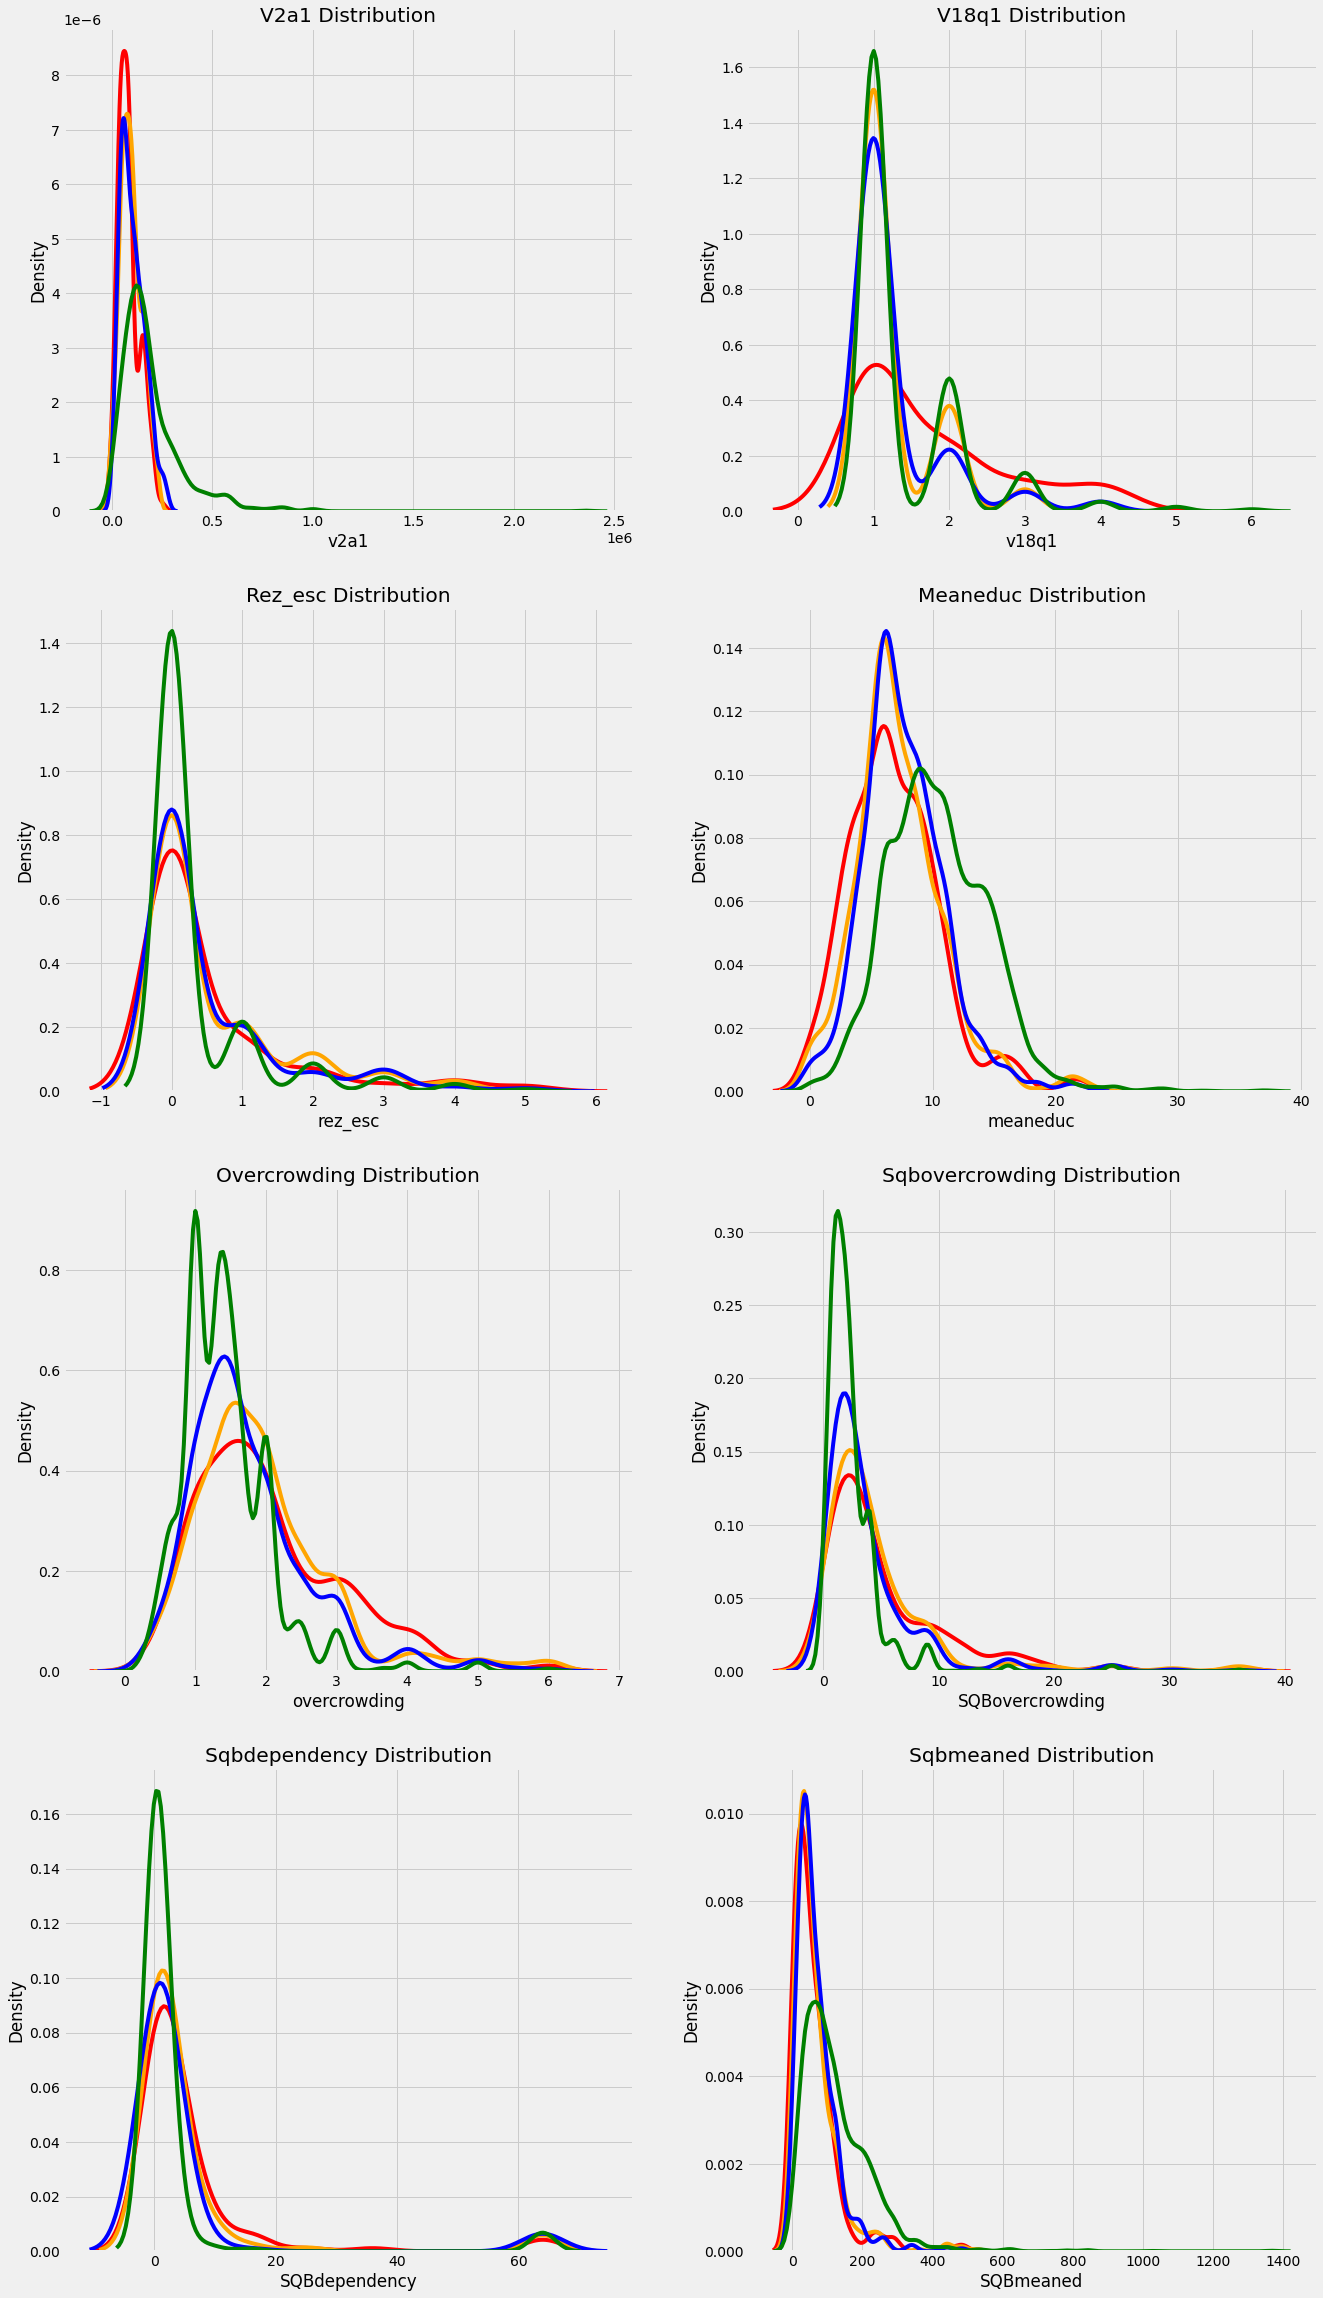

In [11]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extrime', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate Through the float columns
for i, col in enumerate(train.select_dtypes('float')):
  ax = plt.subplot(4, 2, i + 1)
  # Iterate Through the poverty levels
  for poverty_level, color in colors.items():
    # Plot each poverty lavel as a separate line
    # train.loc[train['Target'] == poverty_level, col] = train.loc[train['Target'] == poverty_level][col] 과 같은 의미
    sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax,
                      color = color, label = poverty_mapping[poverty_level])
    
  plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

  plt.subplots_adjust(top = 2)

  # red = extream
  # orange = moderate
  # blue = vulnerable
  # green = non vulnerable

나중에 변수들과 `Target` 사이의 상관관계를 계산할 것입니다. 그리고 피처들 간의 관계를 측정할 것입니다. 하지만 이러한 플롯들은 이미 우리에게 감각을 줍니다. 어떤 변수들이 모델과 가장 관련이 있을지를. 예를 들어서 `meaneduc`은 가정에 속한 어른들의 평균 교육 수준을 나타네는데, 이는 빈곤 수준과 관련 있음이 드러납니다. **더 높은 성인들의 교육 수준 평균은 타겟의 더 높은 값을 이끌어냅니다. 이는 덜 심각한 빈곤의 수준입니다.** 교육의 중요성에 대한 주제는 이 노트북에 있어 우리가 계속해서 되풀이할 것입니다.

### Object Comlumns

마지막 컬럼의 타입은 `object`인데, 이는 다음과 같이 살펴볼 수 있습니다.

In [26]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


`Id`와 `idhogar` objecet types는 말이 됩니다. 이는 식별 변수이기 때문입니다. 하지만 다른 컬럼들은 숫자와 문자의 조합인듯 보입니다. 우리는 이를 머신러닝을 하기 전에 해결할 필요가 있습니다. 이러한 컬럼들의 문서에 따르면

* `dependency`: 의존율, calculated = 19세 미만 또는 64세 이상 가구원 수 / 19세에서 64세 사이의 가구원 수 (일할 수 없는 사람들 / 일할 수 있는 사람들?)
* `edjefe`: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0  
* `edjefa`: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

이러한 설명은 이슈를 명확하게 만듭니다. **yes = 1**, **no = 0** 과 같은 세 개의 변수에 있어서. 이러한 변수를 매핑과 floats로 변환하여 고칠 수 있습니다.

In [28]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to bith train and test
for df in [train, test]:
  # Fill in the values with the correct mapping
  df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
  df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


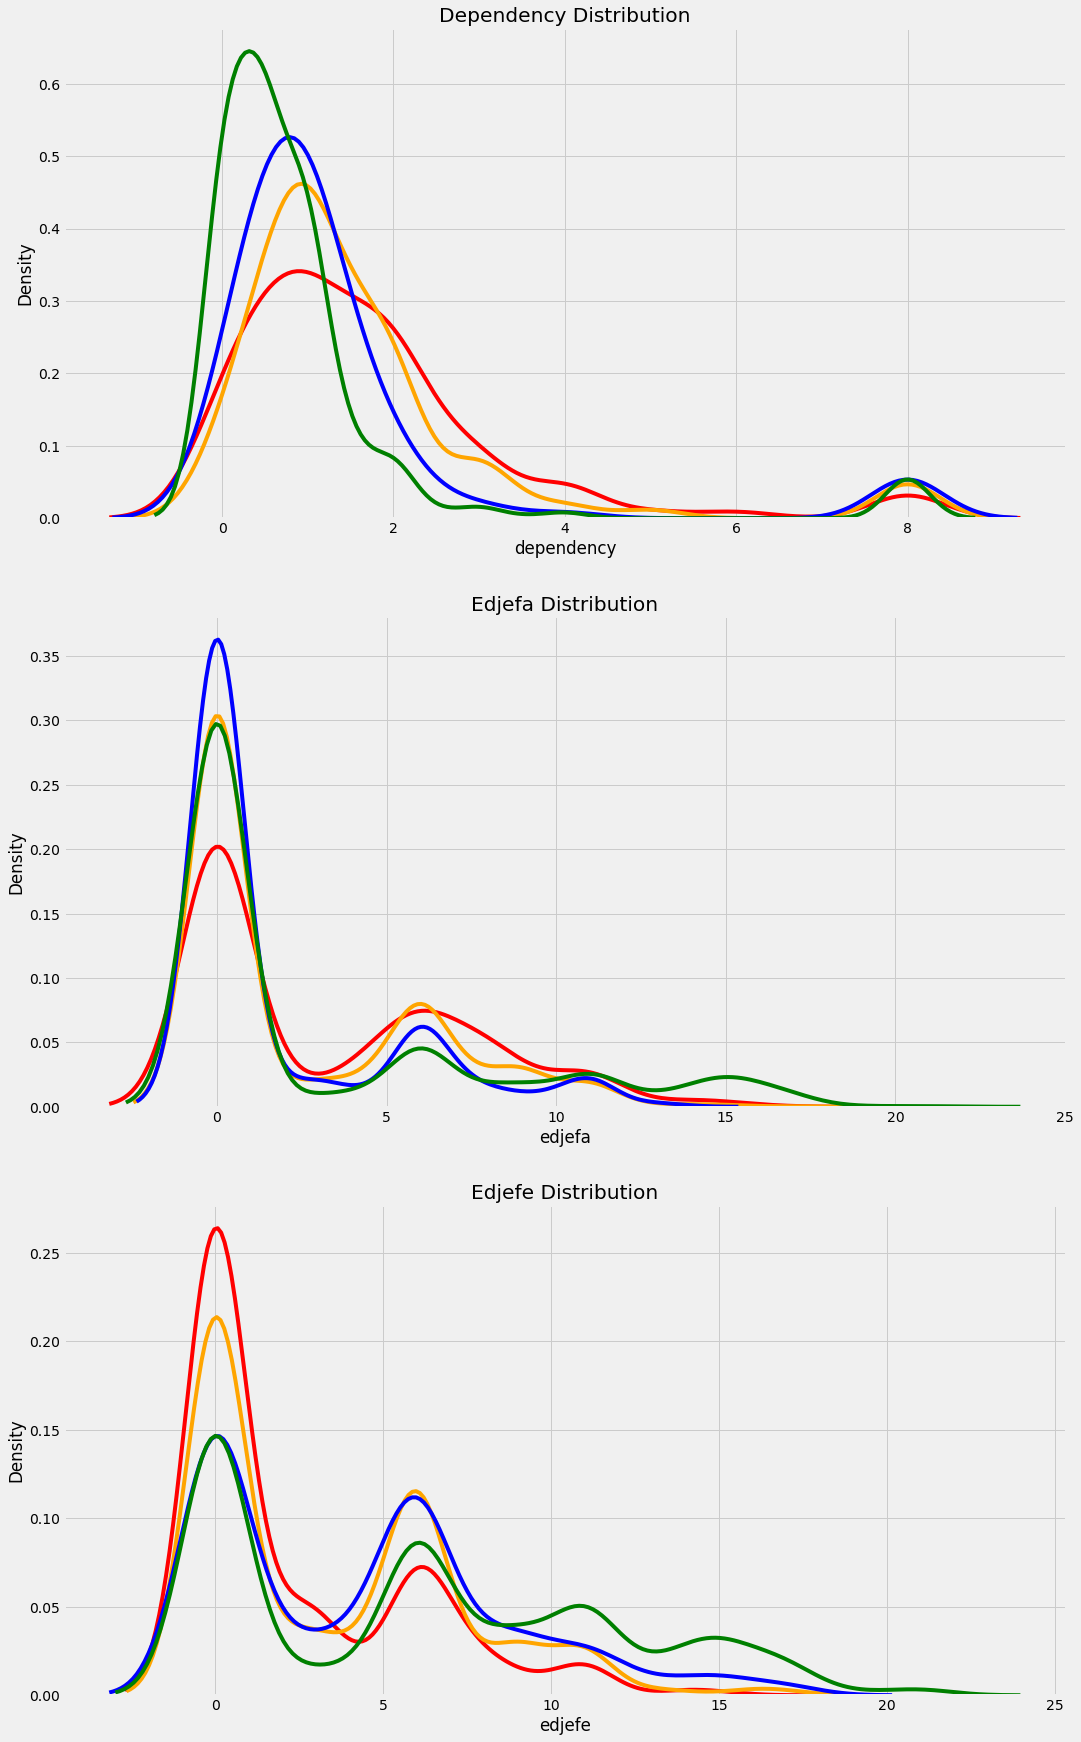

In [35]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    for poverty_level, color in colors.items():
      # Plot each poverty level as a separate line
      sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                      ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
plt.subplots_adjust(top = 2)

  # red = extream
  # orange = moderate
  # blue = vulnerable
  # green = non vulnerable